In [1]:
import pytesseract

In [2]:
import pytesseract

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"
import matplotlib.pyplot as plt

In [5]:
import cv2

In [13]:
image = cv2.imread('demo.jpg')

In [14]:
print(image)

[[[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 ...

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[248 248 248]
  [248 248 248]
  [248 248 248]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]]


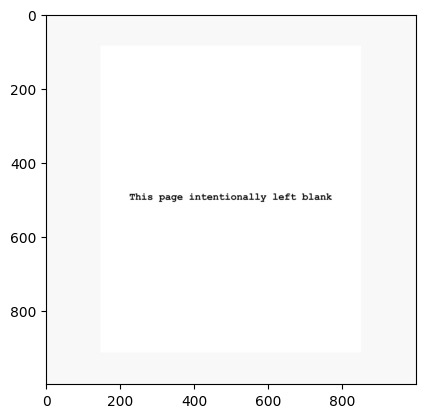

In [15]:
plt.imshow(image)

In [16]:
image

array([[[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       ...,

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]]

In [17]:
image2char = pytesseract.image_to_string(image)

In [18]:
print(image2char)

This page intentionally left blank



In [19]:
imagebox = pytesseract.image_to_boxes(image)

In [20]:
print(imagebox)

T 226 498 240 514 0
h 242 498 257 515 0
i 259 498 272 515 0
s 275 497 288 510 0
p 305 492 321 510 0
a 323 497 337 510 0
g 339 492 354 510 0
e 355 497 369 510 0
i 388 498 401 515 0
n 403 498 418 510 0
t 420 497 434 514 0
e 436 497 450 510 0
n 451 498 466 510 0
t 469 497 483 514 0
i 485 498 498 515 0
o 500 497 514 510 0
n 516 498 531 510 0
a 533 497 547 510 0
l 549 498 562 515 0
l 565 498 578 515 0
y 580 492 595 510 0
l 614 498 626 515 0
e 629 497 643 510 0
f 646 498 660 515 0
t 662 497 676 514 0
b 692 497 708 515 0
l 710 498 723 515 0
a 726 497 740 510 0
n 742 498 756 510 0
k 758 498 773 515 0



In [21]:
imagebox = pytesseract.image_to_boxes(image)


In [22]:
imageH, imageW,_ = image.shape


In [23]:
image.shape

(1000, 1000, 3)

In [24]:
for boxes in imagebox.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    cv2.rectangle(image, (x,imageH-y), (w,imageH-h), (0,0,225),3)

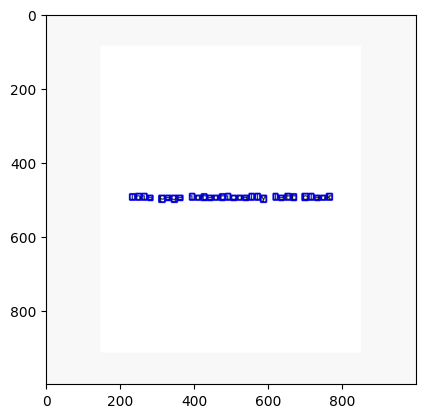

In [25]:
plt.imshow(image)

In [26]:
import cv2
import numpy as np
font_scale = 1.5

In [27]:
font= cv2.FONT_HERSHEY_PLAIN

In [28]:
import cv2
import pytesseract

# Initialize the video capture object
cap = cv2.VideoCapture(1)

# Check if the camera is opened successfully
if not cap.isOpened():
    # If the camera at index 1 is not opened, try opening the default camera (index 0)
    cap = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cap.isOpened():
    # If neither camera is opened successfully, raise an IOError
    raise IOError("Cannot open video")

# Counter to control processing frequency
cntr = 0

while True:
    # Read a frame from the video capture
    ret, frame = cap.read()

    # Increment the counter
    cntr += 1

    # Process every 20th frame
    if (cntr % 20) == 0:
        # Get the dimensions of the frame
        imageH, imageW, _ = frame.shape

        # Set region of interest to the whole frame
        x1, y1, w1, h1 = 0, 0, imageH, imageW

        # Perform OCR on the frame
        imagechar = pytesseract.image_to_string(frame)
        imageboxes = pytesseract.image_to_boxes(frame)

        # Iterate over each detected box
        for boxes in imageboxes.splitlines():
            boxes = boxes.split(' ')
            x, y, w, h = int(boxes[1]), int(boxes[2]), int(boxes[3]), int(boxes[4])

            # Draw a rectangle around the detected text region
            cv2.rectangle(frame, (x, imageH - y), (w, imageH - h), (0, 0, 255), 3)

            # Add the detected text as label
            cv2.putText(frame, imagechar, (x1 + int(w1 / 50), y1 + int(h1 / 50)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Display the frame with text detection
        cv2.imshow('text detection tutorial', frame)

        # Check if 'a' key is pressed to break the loop
        if cv2.waitKey(2) & 0xFF == ord('a'):
            break

# Release the video capture object
cap.release()

# Close all OpenCV windows
cv2.destroyAllWindows()
